# COSADAMA 머신러닝 입문_Classification_Titanic
##### ◾ 작성자: 정 찬
##### ◾ 작성일: 2022년 8월
##### ◾ 사용 데이터: [Kaggle Titanic Dataset](https://www.kaggle.com/competitions/titanic/data)
##### ◾ 실습내용: Titanic 호의 생존자, 사망자가 가진 피처(특징)을 통해 어떤 사람이 생존했는지 분류합니다. COSADAMA의 **데이터 사이언스 입문 커리큘럼 2. Pandas_활용**을 학습하셨다면 바로 **이 Colab 파일의 2. 전처리 파트**로 넘어가셔도 좋습니다.




## 0. Data 확인

In [ ]:
# sklearn 다운로드
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ca20fe7f21d2868d48f969047559b1acad374882ab7aace0406388076af10e46
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


#### 모듈 import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/chanstouch/2022-ml-curriculum/main/data/titanic/train.csv")
train["source"]="train"

df = train
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/chanstouch/2022-ml-curriculum/main/data/titanic/test.csv')
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# dtype 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  source       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


- object형 피처: Name, Sex, Ticket, Cabin, Embarked
- float형 피처: Age
- int형 피처: 나머지

- pclass:Passenger Class, 승객 등급
- survived: 생존 여부(생존은 1, 아닌 경우는 0). target data
- name: 이름
- sex: 성별
- age: 나이
- sibsp: 동승한 형제 또는 배우자 수
- parch: 동승한 부모 또는 자녀 수
- ticket: 티켓 번호
- fare: 승객 지불 요금
- cabin: 선실 이름
- embarked: 승선항(C: 셰르부르, Q: 퀸즈타운, S: 사우스 햄튼)

In [ ]:
# null 값 확인
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
source           0
dtype: int64

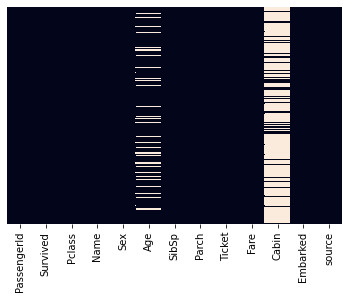

In [ ]:
import seaborn as sns

sns.heatmap(train.isnull(), yticklabels = False, cbar = False)


- Age, Embarked는 null값 대체
- Cabin은 null값이 대부분이기 때문에 삭제.
    - 하지만 선박 침몰은 한쪽 방향으로 이루어지고, 배의 상단에 위치할 수록 생존 가능성이 높아지므로 데이터만 허락한다면 좋은 지표가 될 수 있을 것으로 예상. 따라서 분석과는 별개로 전처리를 해 볼 예정.


In [ ]:
# 수치형 데이터 주요 지표 확인
train.describe()
#- AGE는 ms, mrs 등 Prefix을 통해 여성의 연령대를 추정하기 쉬우므로 Prefix라는 컬럼을 새로 만들고, 평균, 중앙값을 통해 결측치를 대체하겠음.


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
combined_data = [train,test]

for data in combined_data:
    data["Prefix"] = data["Name"].str.extract(' ([A-Za-z]+)\.', expand = False)


In [ ]:
Prefix_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":0,"Dr":3,"Rev":3,
                  "Major":3,"Mlle":1,"Col":3,"Capt":0,"Sir":0,"Ms":1,
                  "Lady":1,"Mme":3,"Countess":3,"Jonkheer":3,"Don":3}
for data in combined_data:
    data["Prefix"] = data["Prefix"].map(Prefix_mapping)



## 1. EDA


### 1.1. 이산형 변수 EDA

In [ ]:
#> **1.1.1. Pclass & Survived**
# Pclass등급과 생존률survive의 관계
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Pclass-Survived')

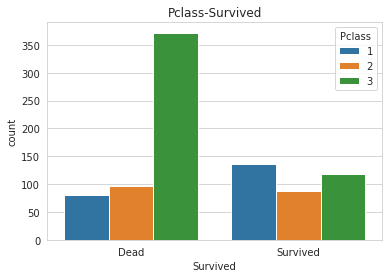

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Pclass", data = train)
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Pclass-Survived')


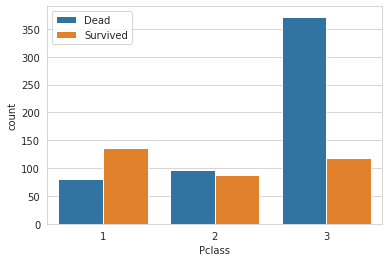

In [ ]:
ax = sns.countplot("Pclass", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper left')
#- Pclass가 낮을 수록 사망률이 높았다.



Text(0.5, 1.0, 'Pclass-Survived')

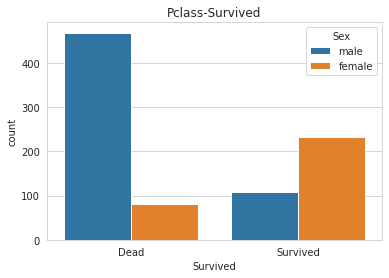

In [ ]:
#> **1.1.2. Sex & Survived**
# Sex와 생존률survive의 관계
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Sex", data = train)
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Pclass-Survived')


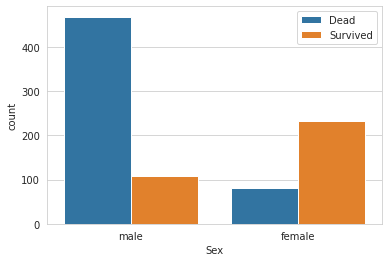

In [ ]:
ax = sns.countplot("Sex", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')


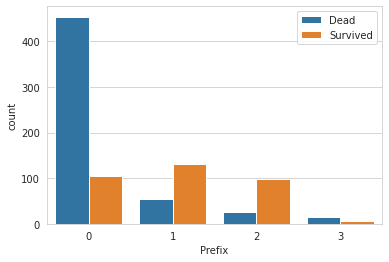

In [ ]:
ax = sns.countplot("Prefix", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')



- 0(Mr): 남성은 생존자보다 사망자가 많다.
- 1(Mrs), 2(Miss): 여성은 사망자보다 생존자가 더 많다. 비율상 기혼자의 생존률이 높아 보인다.
- 3(나머지): 미미하지만 사망자가 더 많다.
- 여성이 남성보다 생존률이 높다.

In [ ]:
#> **1.1.3. SibSp & Survived**


In [ ]:
# SibSp과 생존률survive의 관계
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'SibSp-Survived')

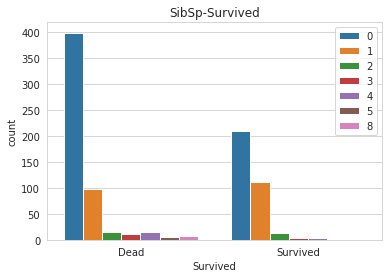

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "SibSp", data = train)
plt.legend(loc = 'upper right')
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('SibSp-Survived')


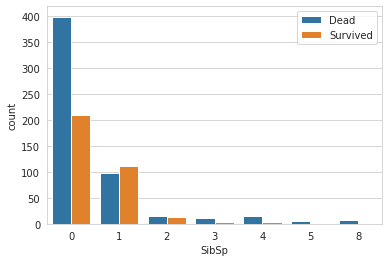

In [ ]:
ax = sns.countplot("SibSp", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')
#- 배우자나 형제-자매가 1명 혹은 2명인 경우의 생존률이 비교적 높았다.



In [ ]:
#> **1.1.4. Parch & Survived**


In [ ]:
# Parch와 생존률survive의 관계
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Parch-Survived')

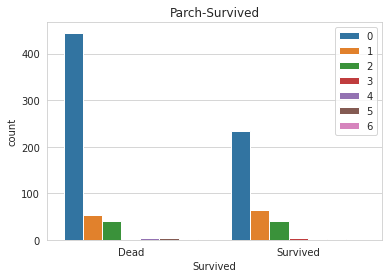

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Parch", data = train)
plt.legend(loc = 'upper right')
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Parch-Survived')


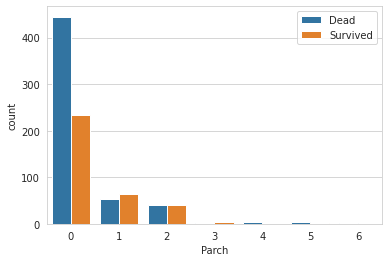

In [ ]:
ax = sns.countplot("Parch", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')


In [ ]:
#- 혼자인 경우가 많아 사망자와 생존자 모두 많았다.
#- 부모 혹은 자식이 3명인 경우의 생존률이 가장 높았고, 1명 혹은 2명인 경우 절반 이상 생존했다.


In [ ]:
#> **1.1.5. Family & Survived**


In [ ]:
# 가족 수를 합쳐 새로운 칼럼 Family 생성.
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']
train['Family'].value_counts()


0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [ ]:
# Family와 생존률survive의 관계
train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


Text(0.5, 1.0, 'Family-Survived')

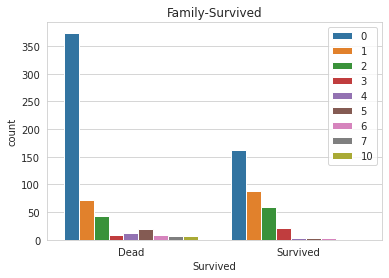

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Family", data = train)
plt.legend(loc = 'upper right')
plt.xticks([0,1],['Dead', 'Survived'])
plt.title('Family-Survived')


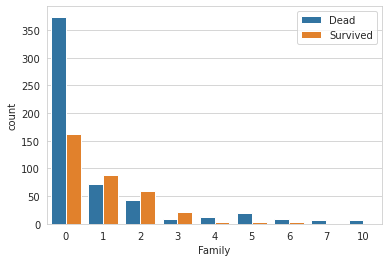

In [ ]:
ax = sns.countplot("Family", hue='Survived', data=train)
plt.legend(labels = ['Dead','Survived'],loc = 'upper right')
#- 가족이 1~3명인 경우 사망자보다 생존자가 더 많았다
#- 가족 없이 혼자 탑승한 경우 탑승자가 워낙 많기 때문에 사망자와 생존자 모두 많았다.


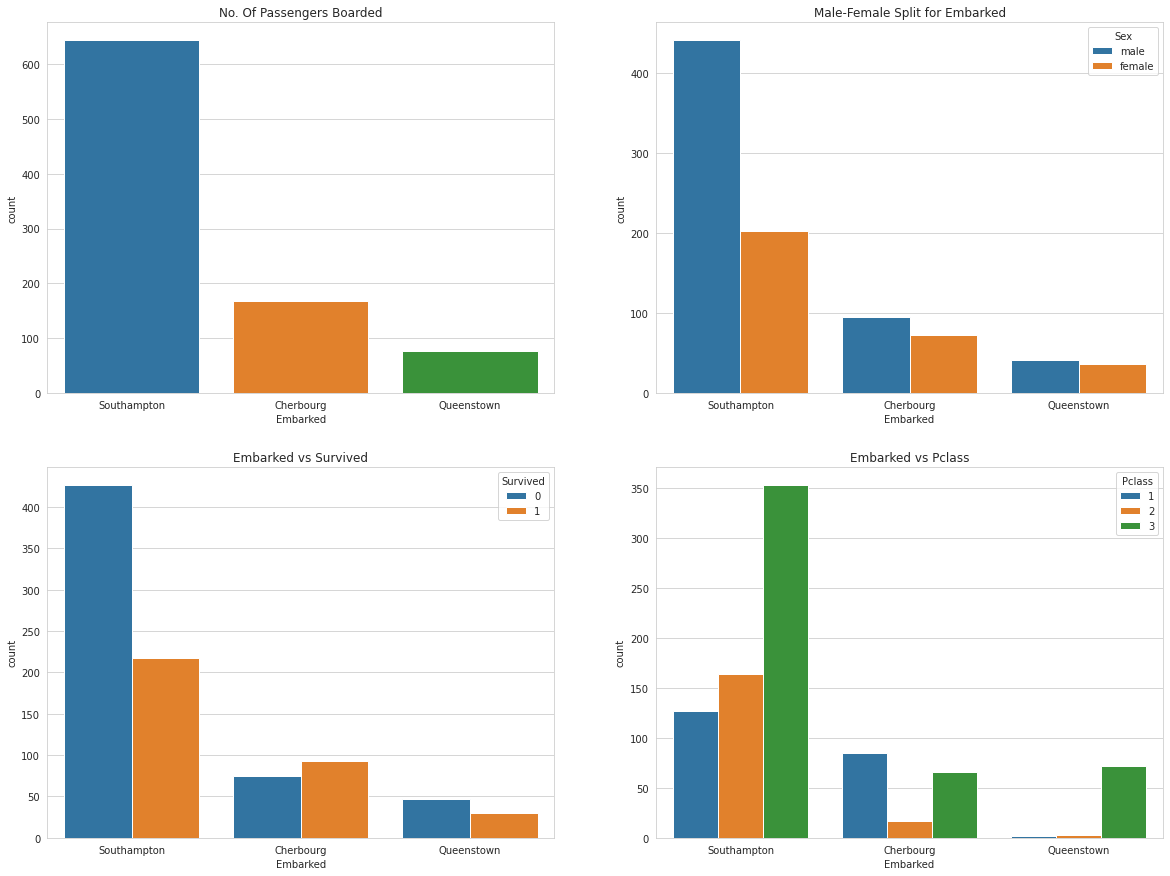

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=train,ax=ax[0,0])

ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,0].set_xticklabels(["Southampton","Cherbourg","Queenstown"])

ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[0,1].set_xticklabels(["Southampton","Cherbourg","Queenstown"])

ax[1,0].set_title('Embarked vs Survived')
ax[1,0].set_xticklabels(["Southampton","Cherbourg","Queenstown"])
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])

ax[1,1].set_title('Embarked vs Pclass')
ax[1,1].set_xticklabels(["Southampton","Cherbourg","Queenstown"])
plt.show()


In [ ]:
#- 절반 이상의 승객이 ‘Southampton’에서 탑승하고, 승객의 70%가 남성
#- Cherbourg에서 탑승한 승객들은 1등 객실 승객의 비중, 생존률이 높음 ->


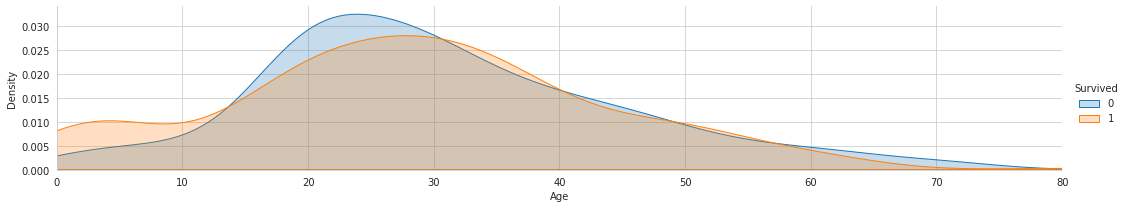

In [ ]:
fac = sns.FacetGrid(train, hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()



In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  source       891 non-null    object 
 13  Prefix       891 non-null    int64  
 14  Family       891 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [ ]:
train.drop(columns = "Ticket", inplace = True)
test.drop(columns = "Ticket", inplace = True)



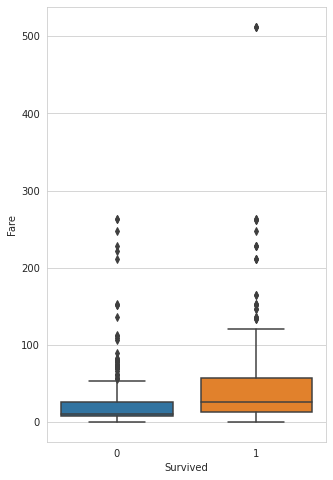

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(x="Survived",y="Fare",data=train)



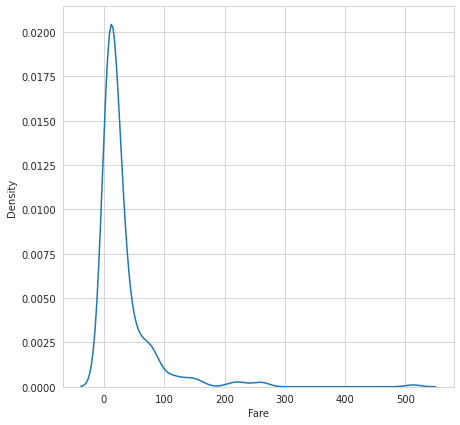

In [ ]:
#Fare데이터 분포 확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Fare"],  hist=False)
test["Fare_log"] =  np.log(test["Fare"] + 1)


(0.0, 100.0)

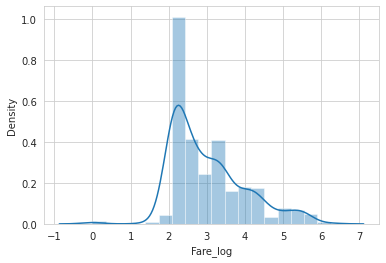

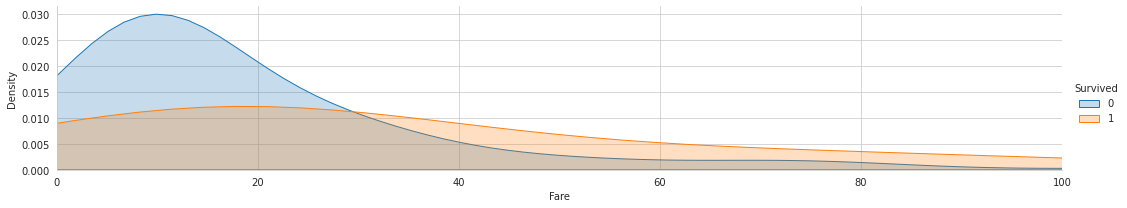

In [ ]:
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(test["Fare_log"])
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Fare',shade=True)
fac.set(xlim=(0,train["Fare"].max()))
fac.add_legend()
plt.xlim(0,100)


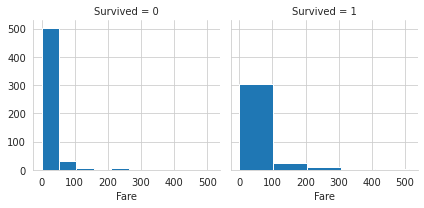

In [ ]:
# Fare요금과 Survived의 관계1
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=5)


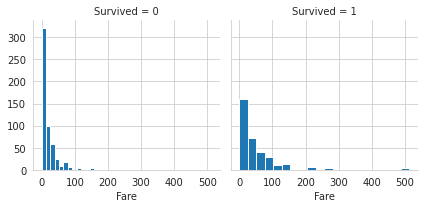

In [ ]:
# Fare요금과 Survived의 관계2
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)


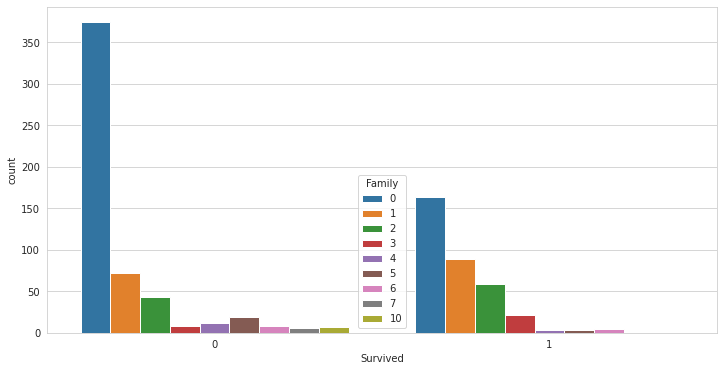

In [ ]:
#### Family: SipSp + Parch
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Family", data = train)



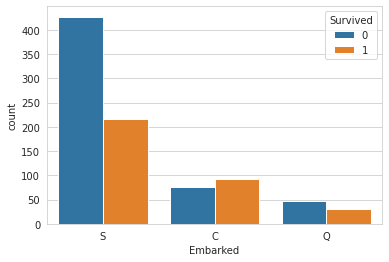

In [ ]:
##> **1.1.7. Embarked & Survived**
# Embarked승선지와 survived의 관계
ax = sns.countplot("Embarked", hue='Survived', data=train)




- S(Southhampton): 영국의 사우스햄튼에서 탑승한 사람들의 사망률이 높다.
- C(Cherbourg): 프랑스의 셰르부르에서 탐승한 사람은 많지 않으며 생존률이 더 높다.
- Q(Queenstown): 아일랜드의 퀸스타운.

- 타이타닉호는 1912년 4월 14일 사우스햄튼-셸부르-퀸즈타운을 거쳐 미국의 뉴욕으로 향했다.
- 1912년은 1차 세계대전이 발발하기 2년 전으로, 1871년 보불전쟁, 1878년 오스트리아-헝가리 제국의 보스니아 헤르체고비나 점령으로 인한 긴장이 팽팽했던 시기다. 이에 따라 유럽의 많은 사람들이 유럽을 떠나 미국으로 이민갔다.
![image.png](attachment:image.png)
출처: https://news.joins.com/article/1765712?cloc=joongang|marticle|footer
- 항해를 시작할 때 사우스햄튼에서 탑승한 사람들의 사망률이 높았다. 여기에는 선원이 포함되어 있고, 셸부르와 퀸즈타운은 선원이 없을 것으로 추정된다.
- 이 가정이 맞다면 앞서 요금이 0에 가까운 사람들의 사망률이 높은 것도 선원이기 때문으로 추측된다.

#### Embarked승선지와 survived의 관계
ax = sns.countplot("Embarked", hue='Survived', data=train)
- S(Southhampton): 영국의 사우스햄튼에서 탑승한 사람들의 사망률이 높다.
- C(Cherbourg): 프랑스의 셰르부르에서 탐승한 사람은 많지 않으며 생존률이 더 높다.
- Q(Queenstown): 아일랜드의 퀸스타운.

- 타이타닉호는 1912년 4월 14일 사우스햄튼-셸부르-퀸즈타운을 거쳐 미국의 뉴욕으로 향했다.
- 1912년은 1차 세계대전이 발발하기 2년 전으로, 1871년 보불전쟁, 1878년 오스트리아-헝가리 제국의 보스니아 헤르체고비나 점령으로 인한 긴장이 팽팽했던 시기다. 이에 따라 유럽의 많은 사람들이 유럽을 떠나 미국으로 이민갔다.
![image.png](attachment:image.png)
출처: https://news.joins.com/article/1765712?cloc=joongang|marticle|footer
- 항해를 시작할 때 사우스햄튼에서 탑승한 사람들의 사망률이 높았다. 여기에는 선원이 포함되어 있고, 셸부르와 퀸즈타운은 선원이 없을 것으로 추정된다.
- 이 가정이 맞다면 앞서 요금이 0에 가까운 사람들의 사망률이 높은 것도 선원이기 때문으로 추측된다.

![image-2.png](attachment:image-2.png)
출처: https://www.thesun.ie/news/5091958/titanic-expert-claims-that-ship-was-on-fire-for-days-before-it-hit-iceberg-during-doomed-maiden-voyage/


### 1.2. 연속형 변수와 survived관계

In [ ]:
##> **1.2.1. Age & Survived**


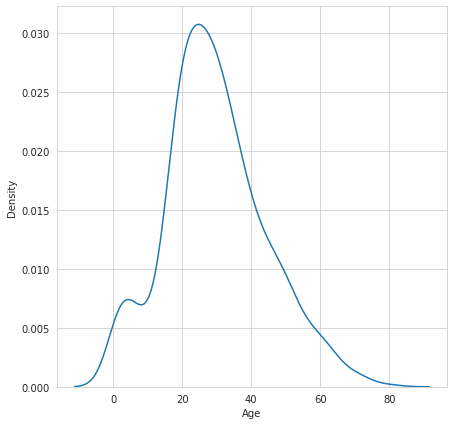

In [ ]:
#Age데이터 분포확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Age"],  hist=False)


In [ ]:
#Age 로그처리-> 정규분포로 바꿔주기
train["Age_log"] =  np.log(train["Age"]+ 1)
test["Age_log"] =  np.log(test["Age"]+ 1)


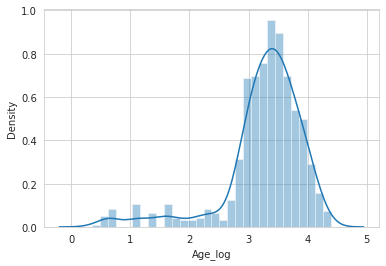

In [ ]:
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Age_log"])


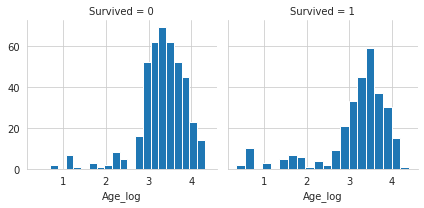

In [ ]:
# Age연령과 survived의 관계
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age_log', bins=20)
#- 0(notsurvived): 0대, 10대의 생존률이 높다, 20~40대의 생존률이 낮다. 60대 이상의 생존률은 높다.
#- 1(survived): 0대의 생존률이 높지만 10대의 생존률은 낮다. 60대 이상의 생존률이 낮다.




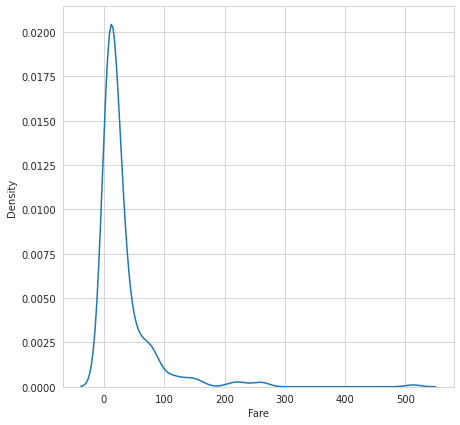

In [ ]:
##> **1.2.2. Fare & Survived**
#Fare데이터 분포 확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Fare"],  hist=False)


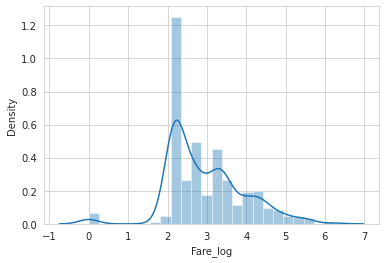

In [ ]:
#Fare 로그처리 -> 정규분포로 바꿔주기
train["Fare_log"] =  np.log(train["Fare"] + 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Fare_log"])


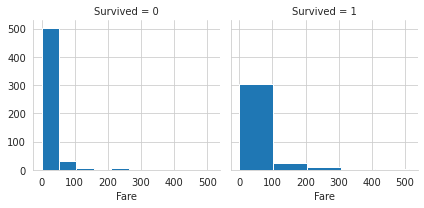

In [ ]:
# Fare요금과 Survived의 관계1
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=5)
#- 요금Fare이 낮은 경우 사망률이 높지만, 전체적으로 많은 사람들이 낮은 요금을 사용했기 때문에 생존률도 제일 높다.


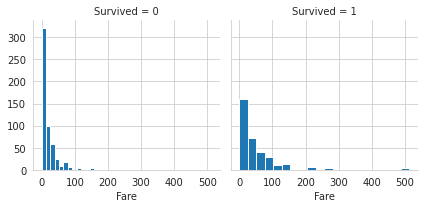

In [ ]:
# Fare요금과 Survived의 관계2
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)
#- 낮은 요금을 낼 수록 사망률이 높지만, 사람이 많은 만큼 생존률도 높은 경향을 보인다.


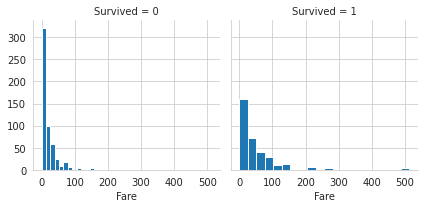

In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)
#- 낮은 요금을 낼 수록 사망률이 높지만, 사람이 많은 만큼 생존률도 높은 경향을 보인다.


In [ ]:
train.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  source       891 non-null    object 
 12  Prefix       891 non-null    int64  
 13  Family       891 non-null    int64  
 14  Age_log      714 non-null    float64
 15  Fare_log     891 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory usage: 111.5+ KB


### 1.3. 두가지 이상의 변수와 생존률Survived의 관계(참고))

In [ ]:
#> **1.3.1. Sex, Pclass & Survived**
train.pivot_table('Survived', index='Sex', columns='Pclass')
#- 여성: 1, 2 등급 객실의 여성은 각각 96%, 92% 생존했고, 3등급 객실의 여성도 50% 생존
#- 남성: 1등급 객실의 남성이 36% 생존하고 2, 3 등급 객실의 남성은 15%이하로 생존


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
# 10년씩 구분
bins = [10, 20, 30, 40, 50, 60, 70]
train['Age_dgt'] = np.digitize(train['Age'], bins)
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,source,Prefix,Family,Age_log,Fare_log,Age_dgt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,train,0,1,3.135494,2.110213,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,train,2,1,3.663562,4.280593,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,train,1,0,3.295837,2.188856,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,train,2,1,3.583519,3.990834,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,train,0,0,3.583519,2.202765,3


In [ ]:
#> **1.3.2. Sex, Age_dgt & Survived**
train.pivot_table('Survived', index='Sex', columns='Age_dgt')
#- 60대 여성, 50대 여성, 30대 여성, 10대 여성, 40대 여성, 20대 여성, 10세 미만 여성, 10세 미만 남성 순으로 생존률이 높았으며, 10대 이상 남성의 생존률은 21%를 넘지 못했다.



Age_dgt,0,1,2,3,4,5,6,7
Sex,,,,,,,,
female,0.633333,0.755556,0.722222,0.833333,0.687500,0.888889,1.000000,0.679245
male,0.593750,0.122807,0.168919,0.214953,0.210526,0.133333,0.133333,0.129771


In [ ]:
#> **1.3.3. Sex, Fare & Survived**
train.pivot_table('Survived', index='Sex', columns='Fare')


Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Sex,,,,,,,,,,,,,,,,,,,,,
female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0
male,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0


In [ ]:
# Fare_log로 구분
bins = [1, 2, 3, 4, 5, 6, 7]
train['Fare_dgt'] = np.digitize(train['Fare_log'], bins)
train.head()
train.pivot_table('Survived', index='Sex', columns='Fare_dgt')


Fare_dgt,0,1,2,3,4,5,6
Sex,,,,,,,
female,NaN,NaN,0.654412,0.704082,0.950820,0.888889,1.0
male,0.066667,0.0,0.133144,0.262069,0.392157,0.125000,1.0


In [ ]:
#- 성별을 불문하고 돈을 많이 낸 사람들은 모두 살아남았다
#- 여성의 경우 Fare가 높을 수록 생존률survived가 높은 경향을 보인다.
#- 남성의 경우 Fare_log가 4에 해당하는 경우의 생존률이 39%로 다른 경우보다 높았다.



In [ ]:
##> **1.3.4. Age_dgt, Fare_dgt & Survived**
train.pivot_table('Survived', index='Age_dgt', columns='Fare_dgt')



Fare_dgt,0,1,2,3,4,5,6
Age_dgt,,,,,,,
0,NaN,NaN,0.875000,0.511628,1.000000,0.500000,NaN
1,0.0,NaN,0.328125,0.363636,0.818182,0.750000,NaN
2,1.0,0.0,0.253247,0.545455,0.608696,0.625000,NaN
3,0.0,0.0,0.243902,0.479167,0.925926,0.666667,1.0
4,0.0,NaN,0.200000,0.428571,0.615385,1.000000,NaN
5,NaN,NaN,0.176471,0.466667,0.571429,1.000000,NaN
6,NaN,0.0,0.500000,0.000000,0.800000,0.000000,NaN
7,0.0,NaN,0.256410,0.358974,0.500000,0.000000,NaN


In [ ]:
##> **1.3.5. Pclass, Fare_dgt & Survived**
train.pivot_table('Survived', index='Pclass', columns='Fare_dgt')
# Age_dgt, Fare_dgt 그리고 Pclass, Fare_dgt와 Survived의 관계를 조사한 결과 뚜렷한 경향성을 파악할 수 없었다.



Fare_dgt,0,1,2,3,4,5,6
Pclass,,,,,,,
1,0.00,0.0,NaN,0.500000,0.780220,0.653846,1.0
2,0.00,NaN,0.416667,0.600000,0.285714,NaN,NaN
3,0.25,0.0,0.244275,0.217949,0.357143,NaN,NaN


In [ ]:
##> **1.3.6. Family_dgt, Age_dgt & Survived**
# Family를 0명, 1명 3명 이상으로 구분
# 1: 본인 혼자
# 2: 배우자, 자식, 혹은 부모 중 1인
# 3: 본인을 포함한 가족구성원 >=3
bins = [0, 1, 2]
train['Family_dgt'] = np.digitize(train['Family'], bins)
test['Family_dgt'] = np.digitize(test['Family'], bins)

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,source,Prefix,Family,Age_log,Fare_log,Age_dgt,Fare_dgt,Family_dgt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,train,0,1,3.135494,2.110213,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,train,2,1,3.663562,4.280593,3,4,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,train,1,0,3.295837,2.188856,2,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,train,2,1,3.583519,3.990834,3,3,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,train,0,0,3.583519,2.202765,3,2,1


In [ ]:
train.pivot_table('Survived', index='Family_dgt', columns='Age_dgt')


Age_dgt,0,1,2,3,4,5,6,7
Family_dgt,,,,,,,,
1,1.000000,0.320755,0.290541,0.380952,0.346939,0.275862,0.230769,0.244604
2,0.833333,0.695652,0.439024,0.516129,0.500000,0.615385,0.666667,0.590909
3,0.581818,0.307692,0.516129,0.548387,0.333333,0.666667,0.333333,0.260870


- 가족 없이 혼자 탑승한 사람들은 유아를 제외하고 35%이하의 생존률을 보였다
- 2인 가족의 경우 유아와 10대의 생존률이 각각 835, 69%로 높지만 20, 30, 40대에서 53%이하의 생존률을 보이고 50, 60대에서 다시 60% 이상의 생존률을 기록했다.
- 3인 이상 가족의 경우 유아와 50대의 생존률이 높았지만 60대 이상의 생존률이 낮았다. 또, 10대부터 40대까지 30~40%의 낮은 생존률을 기록했다.

In [ ]:
##> **1.3.7. Parch, Age_dgt & Survived**
train.pivot_table('Survived', index='Age_dgt', columns='Parch')


Parch,0,1,2,3,4,5,6
Age_dgt,,,,,,,
0,1.000000,0.657143,0.538462,NaN,NaN,NaN,NaN
1,0.380282,0.400000,0.533333,0.0,NaN,NaN,NaN
2,0.304813,0.533333,0.666667,1.0,0.0,NaN,NaN
3,0.411765,0.526316,0.750000,NaN,NaN,0.25,NaN
4,0.373134,0.571429,0.333333,0.0,0.0,0.00,0.0
5,0.368421,0.625000,0.000000,1.0,NaN,NaN,NaN
6,0.333333,0.333333,NaN,NaN,0.0,NaN,NaN
7,0.294479,0.444444,0.083333,NaN,NaN,NaN,NaN


- 유아와 10대의 경우 부모가 없는 경우보다 있는 경우에 생존률이 높은 경향을 보였다.

In [ ]:
##> **1.3.8. Sex, Parch, Age_dgt & Survived**
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Parch')


Parch                  0         1         2    3    4         5    6
Sex    Age_dgt                                                       
female 0        1.000000  0.733333  0.500000  NaN  NaN       NaN  NaN
       1        0.758621  0.857143  0.666667  NaN  NaN       NaN  NaN
       2        0.708333  0.666667  0.833333  1.0  0.0       NaN  NaN
       3        0.857143  0.800000  1.000000  NaN  NaN  0.333333  NaN
       4        0.764706  0.888889  0.500000  0.0  0.0  0.000000  0.0
       5        0.833333  1.000000       NaN  1.0  NaN       NaN  NaN
       6        1.000000       NaN       NaN  NaN  NaN       NaN  NaN
       7        0.804878  0.400000  0.142857  NaN  NaN       NaN  NaN
male   0             NaN  0.600000  0.583333  NaN  NaN       NaN  NaN
       1        0.119048  0.000000  0.333333  0.0  NaN       NaN  NaN
       2        0.165468  0.333333  0.000000  NaN  NaN       NaN  NaN
       3        0.212766  0.222222  0.333333  NaN  NaN  0.000000  NaN
       4        0.240000  0.000000  0.000000  NaN  0.0       NaN  NaN
       5        0.153846  0.000000  0.000000  NaN  NaN       NaN  NaN
       6        0.090909  0.333333       NaN  NaN  0.0       NaN  NaN
       7        0.122951  0.500000  0.000000  NaN  NaN       NaN  NaN

- 부모가 없는 유아 여성은 모두 생존했고, 오히려 부모가 있는 유아 여성의 생존률이 낮았다.
- 반대로 유아 남성의 경우 부모가 존재하는 경우의 생존률이 높았다.

In [ ]:
##> **1.3.9. Sex, SibSp, Age_dgt & Survived**
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='SibSp')



SibSp                  0         1     2    3     4    5    8
Sex    Age_dgt                                               
female 0        0.888889  0.750000  0.80  0.0  0.25  NaN  NaN
       1        0.785714  0.833333  0.50  NaN  0.50  0.0  NaN
       2        0.772727  0.590909  0.75  1.0   NaN  NaN  NaN
       3        0.818182  0.840000   NaN  1.0   NaN  NaN  NaN
       4        0.764706  0.600000   NaN  NaN   NaN  NaN  NaN
       5        0.818182  1.000000  1.00  NaN   NaN  NaN  NaN
       6        1.000000  1.000000   NaN  NaN   NaN  NaN  NaN
       7        0.733333  0.812500  1.00  0.0   NaN  NaN  0.0
male   0        1.000000  1.000000  1.00  0.0  0.10  0.0  NaN
       1        0.135135  0.153846  0.00  0.0  0.00  0.0  NaN
       2        0.159664  0.260870  0.00  NaN   NaN  NaN  NaN
       3        0.222222  0.208333  0.00  NaN   NaN  NaN  NaN
       4        0.170732  0.357143  0.00  NaN   NaN  NaN  NaN
       5        0.120000  0.000000  1.00  NaN   NaN  NaN  NaN
       6        0.083333  0.333333   NaN  NaN   NaN  NaN  NaN
       7        0.123894  0.181818  0.50  0.0   NaN  NaN  0.0

In [ ]:
##> **1.3.10. Sex, Embarked, Age_dgt & Survived**
train.pivot_table('Survived', index=['Sex'], columns='Embarked')
train.pivot_table('Survived', index=['Age_dgt'], columns='Embarked')
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Embarked')


Embarked               C         Q         S
Sex    Age_dgt                              
female 0        0.857143       NaN  0.565217
       1        0.785714  0.800000  0.730769
       2        1.000000  0.500000  0.666667
       3        1.000000  0.400000  0.837209
       4        0.875000       NaN  0.625000
       5        0.857143       NaN  0.909091
       6        1.000000       NaN  1.000000
       7        0.750000  0.833333  0.411765
male   0        1.000000  0.000000  0.653846
       1        0.333333  0.000000  0.100000
       2        0.400000  0.333333  0.116667
       3        0.235294  0.000000  0.215909
       4        0.444444  0.000000  0.177778
       5        0.166667  0.000000  0.130435
       6        0.500000  0.000000  0.083333
       7        0.178571  0.076923  0.129870

In [ ]:

##> **1.3.11. Sex, Title, Age_dgt & Survived**
train.pivot_table('Survived', index=['Sex','Age_dgt'], columns='Prefix')
train.pivot_table('Survived', index=['Prefix','Age_dgt'], columns='SibSp')
# "Mr":0, "Mrs":1, "Miss":2, Other:3



SibSp                  0         1    2    3     4    5    8
Prefix Age_dgt                                              
0      0        1.000000  1.000000  1.0  0.0  0.10  0.0  NaN
       1        0.135135  0.153846  0.0  0.0  0.00  0.0  NaN
       2        0.163793  0.260870  0.0  NaN   NaN  NaN  NaN
       3        0.215190  0.208333  0.0  NaN   NaN  NaN  NaN
       4        0.184211  0.357143  0.0  NaN   NaN  NaN  NaN
       5        0.050000  0.000000  NaN  NaN   NaN  NaN  NaN
       6        0.090909  0.333333  NaN  NaN   NaN  NaN  NaN
       7        0.125000  0.181818  0.5  0.0   NaN  NaN  0.0
1      0        0.888889  0.750000  0.8  0.0  0.25  NaN  NaN
       1        0.777778  0.750000  0.5  NaN  0.50  0.0  NaN
       2        0.718750  0.571429  0.5  1.0   NaN  NaN  NaN
       3        0.800000  1.000000  NaN  NaN   NaN  NaN  NaN
       4        0.800000  1.000000  NaN  NaN   NaN  NaN  NaN
       5        0.800000  1.000000  NaN  NaN   NaN  NaN  NaN
       6             NaN  1.000000  NaN  NaN   NaN  NaN  NaN
       7        0.739130  0.666667  1.0  0.0   NaN  NaN  0.0
2      1        1.000000  0.875000  NaN  NaN   NaN  NaN  NaN
       2        0.909091  0.600000  1.0  NaN   NaN  NaN  NaN
       3        0.857143  0.818182  NaN  1.0   NaN  NaN  NaN
       4        0.727273  0.571429  NaN  NaN   NaN  NaN  NaN
       5        0.833333  1.000000  1.0  NaN   NaN  NaN  NaN
       6        1.000000  1.000000  NaN  NaN   NaN  NaN  NaN
       7        0.714286  0.900000  NaN  NaN   NaN  NaN  NaN
3      2        0.250000       NaN  NaN  NaN   NaN  NaN  NaN
       3        0.666667       NaN  NaN  NaN   NaN  NaN  NaN
       4        0.250000       NaN  0.0  NaN   NaN  NaN  NaN
       5        0.400000  0.000000  1.0  NaN   NaN  NaN  NaN
       6        0.000000       NaN  NaN  NaN   NaN  NaN  NaN
       7        0.000000       NaN  NaN  NaN   NaN  NaN  NaN

> **1.3.12. Fare, Pclass & Survived**

In [ ]:
# Fare_log를 1~7로 구분
# 클 수록 많은 Fare를 지출

bins = [0, 1, 2, 3, 4, 5, 6, 7]
train['Fare_log_dgt'] = np.digitize(train['Fare_log'], bins)
train.head()
train.pivot_table('Survived', index='Pclass', columns='Fare_log')


Fare_log,0.000000,1.611935,1.791759,1.979276,2.006535,2.008214,2.014343,2.047693,2.061570,2.073172,...,5.039951,5.111184,5.358177,5.358942,5.406181,5.431646,5.515527,5.573579,5.575949,6.240917
Pclass,,,,,,,,,,,,,,,,,,,,,
1,0.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.666667,1.0,1.0,0.0,0.0,0.75,0.5,1.0,0.5,1.0
2,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.25,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Fare_log_dgt와 생존률survive의 관계
train[['Fare_log_dgt', 'Survived']].groupby(['Fare_log_dgt'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Fare_log_dgt,Survived
6,7,1.000000
4,5,0.696429
5,6,0.653846
3,4,0.440329
2,3,0.278119
0,1,0.066667
1,2,0.000000


In [ ]:
train.pivot_table('Survived', index='Pclass', columns='Fare_log_dgt')


Fare_log_dgt,1,2,3,4,5,6,7
Pclass,,,,,,,
1,0.00,0.0,NaN,0.500000,0.780220,0.653846,1.0
2,0.00,NaN,0.416667,0.600000,0.285714,NaN,NaN
3,0.25,0.0,0.244275,0.217949,0.357143,NaN,NaN


In [ ]:
corr = train[['Fare_log_dgt', 'Pclass']].corr()
print(corr)
# -0.61: 높은 상관관계



              Fare_log_dgt    Pclass
Fare_log_dgt      1.000000 -0.619297
Pclass           -0.619297  1.000000


In [ ]:
print(corr)
# -0.61: 높은 상관관계



              Fare_log_dgt    Pclass
Fare_log_dgt      1.000000 -0.619297
Pclass           -0.619297  1.000000


### 1.5. EDA 정리


- Pclass: 등급이 높을수록 생존률이 높은 경향을 보였다.
- Sex: 여성이 남성보다 생존률이 높은 경향을 보였다.
- Family: 가족이 1~3명인 경우 생존률이 높다.(본인 제외) - 4인가족인 경우 생존률이 가장 높았다.
- Cabin: A, G, C, F, B, E, D 순서로 생존률이 높았다.
- Fare_log_dgt: 7, 5, 6, 4, 3, 1, 2 순서로 생존률이 높았다. (값이 클 수록 많은 Fare를 지출)
- Pclass & Fare_log_dgt: Pclass가 1이면서 많은 Fare를 지출한 사람들이 많이 생존했다. 하지만 Pclass가 2인 경우 많은 Fare를 지출했다고 해서 생존률이 높지는 않았다. Pclass가 3인 경우 미미하게 생존률이 증가하기는 했지만 대체적으로 낮은 생존률을 보였다. 비슷한 요금을 지불했음에도 Pclass별로 생존률이 차이났음을 알 수 있다. 여기서 배의 구조가 생존률에 영향을 끼쳤을 가능성이 있다고 생각되었다.
![image-2.png](attachment:image-2.png)
https://www.anatomynote.com/wp-content/uploads/2019/09/15465/Titanic-sectional-structure-diagram.jpg
https://www.anatomynote.com/transportation-anatomy/ship-anatomy/titanic-sectional-structure-diagram/
- 타이타닉호는 알파벳 순서로 갑판과 가장 가깝고, 많은 비용Fare를 지출하는 구조였다.
    - S(일광욕용 갑판Sun deck)
    - A(상부 산책로 갑판Upper promenade deck): 배를 둘러싼 복도가 외부로 뚫려 있어 산책할 수 있다. 1등실 객실, 라운지, 흡연실, 독서실, 야자수 코트
    - B(선교루 갑판Promenade deck), glass enclosed: 1등급 객실, 레스토랑, 카페, 선미 부분에 3등실 산책로
    - C(상층 갑판Upper deck): 3등실 산책로, 선원 숙소, 3등실 전용 휴게실과 흡연실, 1등실 객실, 2등실 도서관
    - D(살롱 갑판Saloon deck): 1등실 대합실, 1등실 식당, 2등실 식당, 1,2,3등급 객실, 화부 숙소
    - E(메인 갑판Main deck): 1, 2, 3등실 객실 및 선원숙소
    - F(중간 갑판Middle deck): 대부분의 3등실 객실과 2등 객실 및 선원숙소, 3등실 식당, 1등실용 수영장
    - G(하부 갑판Lower deck): 객실이 있는 가장 낮은 갑판, 스쿼시장, 창고, 보일러실, 기관실 등

1. Fare가 높을 수록 Pclass가 낮다(대우도 성립).
2. Fare가 높고, Pclass가 낮을수록 배의 윗부분Cabin에서 주로 생활했다.
3. 다만 fare_log_dgt와 Pclass의 상관관계에서 0.39에 해당하는 사람들은 다른 Pclass와 Cabin 위치가 섞인 경우다.


### 만약 Cabin의 결측치가 적었다면?
- cabin 있는지 여부
- cabin 위치 인코딩

In [ ]:
print(train["Cabin"].isna().value_counts())
print(test["Cabin"].isna().value_counts())


True     687
False    204
Name: Cabin, dtype: int64
True     327
False     91
Name: Cabin, dtype: int64


In [ ]:
combined_data = [train,test]


In [ ]:
train["Cabin"].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
for data in combined_data:
    data["Cabin"] = data["Cabin"].str.extract('([A-Za-z]+)', expand = False)

train.Cabin.head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

In [ ]:
cabin_rate = train.groupby(['Cabin','Survived']).count()
    # Title로 사망자 집계
    # 0: 사망
    # 1: 생존
cabin_rate


PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Fare  \
Cabin Survived                                                            
A     0                   8       8     8    8    5      8      8     8   
      1                   7       7     7    7    7      7      7     7   
B     0                  12      12    12   12   11     12     12    12   
      1                  35      35    35   35   34     35     35    35   
C     0                  24      24    24   24   21     24     24    24   
      1                  35      35    35   35   30     35     35    35   
D     0                   8       8     8    8    8      8      8     8   
      1                  25      25    25   25   23     25     25    25   
E     0                   8       8     8    8    8      8      8     8   
      1                  24      24    24   24   22     24     24    24   
F     0                   5       5     5    5    4      5      5     5   
      1                   8       8     8    8    7      8      8     8   
G     0                   2       2     2    2    2      2      2     2   
      1                   2       2     2    2    2      2      2     2   
T     0                   1       1     1    1    1      1      1     1   

                Embarked  source  Prefix  Family  Age_log  Fare_log  Age_dgt  \
Cabin Survived                                                                 
A     0                8       8       8       8        5         8        8   
      1                7       7       7       7        7         7        7   
B     0               12      12      12      12       11        12       12   
      1               33      35      35      35       34        35       35   
C     0               24      24      24      24       21        24       24   
      1               35      35      35      35       30        35       35   
D     0                8       8       8       8        8         8        8   
      1               25      25      25      25       23        25       25   
E     0                8       8       8       8        8         8        8   
      1               24      24      24      24       22        24       24   
F     0                5       5       5       5        4         5        5   
      1                8       8       8       8        7         8        8   
G     0                2       2       2       2        2         2        2   
      1                2       2       2       2        2         2        2   
T     0                1       1       1       1        1         1        1   

                Fare_dgt  Family_dgt  Fare_log_dgt  
Cabin Survived                                      
A     0                8           8             8  
      1                7           7             7  
B     0               12          12            12  
      1               35          35            35  
C     0               24          24            24  
      1               35          35            35  
D     0                8           8             8  
      1               25          25            25  
E     0                8           8             8  
      1               24          24            24  
F     0                5           5             5  
      1                8           8             8  
G     0                2           2             2  
      1                2           2             2  
T     0                1           1             1

In [ ]:
    # Cabin별 생존자
cabin_count = pd.DataFrame(cabin_rate.Prefix)
cabin_count = cabin_count.reset_index()
cabin_count = cabin_count.groupby(['Survived','Cabin']).sum()
cabin_count = cabin_count.reset_index()


In [ ]:
cabin_count_set = set(cabin_count['Cabin'])
cabin_count_list = list(cabin_count_set)
len(cabin_count_list)


8

In [ ]:
cabin_count = cabin_count.reset_index()


In [ ]:
cabin_count


,index,Survived,Cabin,Prefix
0,0,0,A,8
1,1,0,B,12
2,2,0,C,24
3,3,0,D,8
4,4,0,E,8
5,5,0,F,5
6,6,0,G,2
7,7,0,T,1
8,8,1,A,7
9,9,1,B,35


In [ ]:
# pclass등급별 가장 많이 있는 객실cabin 알아보기
num_list= list(range(1,4))
cab_list = []


for n in range(1,4):
    nan_df = pd.DataFrame(train[train["Pclass"] == n]["Cabin"].value_counts()).reset_index()
    nan_df["Cab_type"] = nan_df["index"]
    nan = nan_df.Cabin.max()
    nan_cab = nan_df[nan_df["Cabin"]== nan]["Cab_type"]
    cab_list.append(nan_cab)
cab_list= pd.DataFrame(cab_list).reset_index()
cab_list= cab_list.drop("index", 1)
cab_list["Cabin"] = cab_list[0]
cab_list = cab_list.drop(0,1)
cab_list["Pclass"] = [1,2,3]

cab_list

# pclass=1이 제일 많았던 곳은 C
# pclass=2,3이 제일 많았던 곳은 F


,Cabin,Pclass
0,C,1
1,F,2
2,F,3


In [ ]:
# 일단 결측치를 N으로 처리
import numpy as np
train["Cabin"] = train.Cabin.replace(np.nan, 'N')

#결측치 N을 등급별 가장 많이 있던 Cabin으로 바꾸기

for n in range(0, len(train)):
    if train["Cabin"][n] == 'N':
        if train['Pclass'][n] == 1:
            train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==1].unique()[0]
        elif train['Pclass'][n] == 2:
            train['Cabin'][n] = cab_list.Cabin[cab_list["Pclass"]==2].unique()[0]
        else:
            train["Cabin"][n] = cab_list.Cabin[cab_list["Pclass"]==3].unique()[0]
    else:
        train['Cabin'][n] = train['Cabin'][n]


In [ ]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Prefix       417 non-null    float64
 11  Family       418 non-null    int64  
 12  Fare_log     417 non-null    float64
 13  Age_log      332 non-null    float64
 14  Family_dgt   418 non-null    int64  
dtypes: float64(5), int64(6), object(4)
memory usage: 49.1+ KB


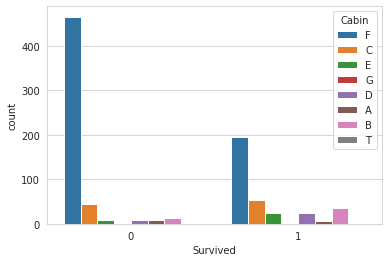

In [ ]:
sns.countplot(x = "Survived", hue = "Cabin", data= train)

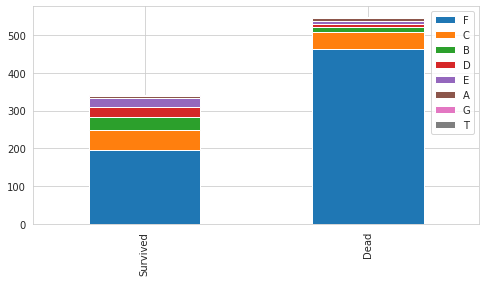

In [ ]:
survived = train[train["Survived"]==1]["Cabin"].value_counts()
dead = train[train["Survived"]==0]["Cabin"].value_counts()
df_cabin = pd.DataFrame([survived,dead])
df_cabin.index = ["Survived","Dead"]
df_cabin.plot(kind="bar",stacked = True, figsize = (8,4))




> **1.1.6. Cabin & Survived**

In [ ]:
# Cabin과 생존률survive의 관계
list_p = []
for n in range(0,8):
    # 사망자/ (사망자 + 생존자) * 100
    p = cabin_count.Prefix[n]/(cabin_count.Prefix[n]+cabin_count.Prefix[n+7])*100
    list_p.append( [cabin_count.Cabin[n] , p] )
list_deck_point = pd.DataFrame(list_p)


In [ ]:
list_deck_point['rate'] = list_deck_point[1]
list_deck_point = list_deck_point.drop(1,1)
list_deck_point.sort_values(by=['rate'], axis=0, ascending=False)


,0,rate
0,A,88.888889
1,B,63.157895
2,C,40.677966
7,T,33.333333
4,E,24.242424
6,G,20.000000
3,D,18.604651
5,F,17.241379


In [ ]:
# 생존률에 따라 점수 부여

cabin_mapping = {"A": 89, "G": 63, "C": 40, "T":33, "F":24, "B":20,"E":19,"D":17}
train['Cabin_score'] = train['Cabin'].map(cabin_mapping)
train.Cabin_score.head()

0    24
1    40
2    24
3    40
4    24
Name: Cabin_score, dtype: int64

- 비록 사용할 수 없는 데이터지만 점수까지 부여해 보았다.
- A, B, C, T, E, G, D, F 순서로 생존률이 높았다
- T는 데이터가 하나 밖에 없기 때문에 삭제하는 편이 성능을 높일 것으로 보인다.
- T값을 33 혹은 조정치를 적용했을 때 모두 cabin_score과 survived의 관계는 낮았다.

## 2. 전처리


### 2.1. 결측치 전처리


#### 2.1.1. Age 전처리

In [ ]:
train.groupby(['Prefix'])['Age'].agg(['mean', 'median'])


,mean,median
Prefix,,
0,30.197638,28.0
1,22.020000,21.5
2,35.898148,35.0
3,42.950000,44.5


In [ ]:
#Mr, Mrs, Miss별 나이의 중앙값을 나이의 결측치에 넣기

train["Age"].fillna(train.groupby("Prefix")["Age"].transform("median"), inplace=True)
train.groupby("Prefix")["Age"].transform("median")


0      28.0
1      35.0
2      21.5
3      35.0
4      28.0
       ... 
886    44.5
887    21.5
888    21.5
889    28.0
890    28.0
Name: Age, Length: 891, dtype: float64

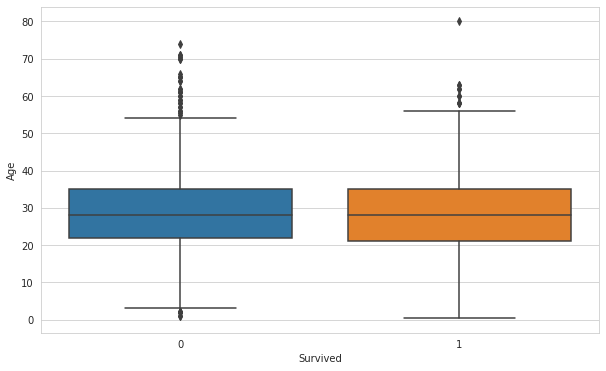

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Survived",y="Age",data=train)


In [ ]:
train["Age_log"] =  np.log(train["Age"]+ 1)
test["Age_log"] =  np.log(test["Age"]+ 1)


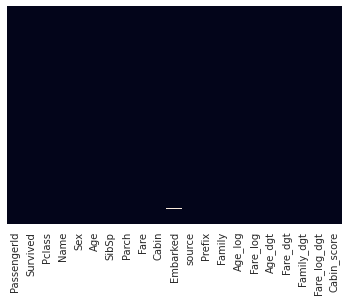

In [ ]:
# 결측치 확인
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)



- 생존률: 여성 > 남성
- 사망률: 여성 < 남성

In [ ]:
train["Age"] = pd.to_numeric(train["Age"], downcast="integer")
test["Age"] = pd.to_numeric(test["Age"], downcast="integer")



- age를 pclass별로 묶을 수도 있다.

#### 2.1.2. Embarked 전처리

In [ ]:
# embarked null값을 가장 많이 탄 곳으로 변환
# mode(): 최빈값
freq_port_tr = train.Embarked.dropna().mode()[0]
freq_port_ts = test.Embarked.dropna().mode()[0]
freq_port_tr



'S'

In [ ]:
# 제일 많은 Southhampton으로 결측치 처리

train['Embarked'] = train['Embarked'].fillna(freq_port_tr)
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

test['Embarked'] = test['Embarked'].fillna(freq_port_ts)
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)


In [ ]:
#### 1.1.3. Sex 전처리
dummy = pd.get_dummies(train["Sex"])
train["Sex"] = dummy["female"]


In [ ]:
dummy2 = pd.get_dummies(test["Sex"])
test["Sex"] = dummy2["female"]
test["Sex"]

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: uint8

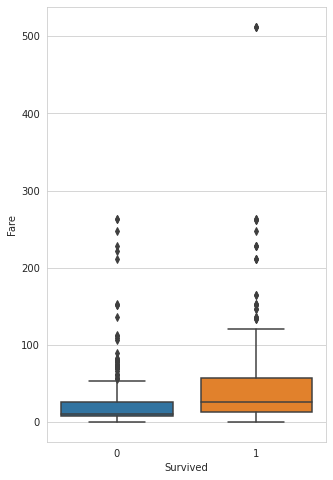

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(x="Survived",y="Fare",data=train)



In [ ]:
fare_first = train["Fare"][train["Pclass"]==1].mean()
fare_second = train["Fare"][train["Pclass"]==2].mean()
fare_third = train["Fare"][train["Pclass"]==3].mean()
print("Average Fare for First class Passenger : ",fare_first)
print("Average Fare for Second class Passenger : ",fare_second)
print("Average Fare for Third class Passenger : ",fare_third)


Average Fare for First class Passenger :  84.1546875
Average Fare for Second class Passenger :  20.662183152173913
Average Fare for Third class Passenger :  13.675550101832993


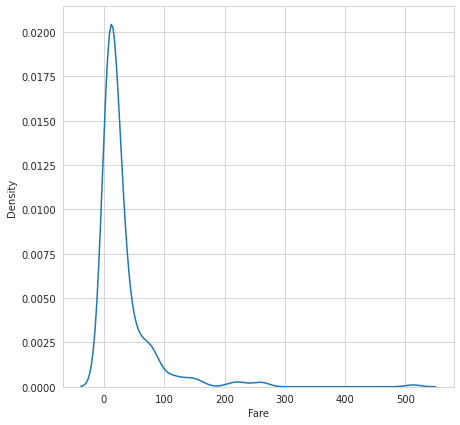

In [ ]:
#Fare데이터 분포 확인
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(train["Fare"],  hist=False)


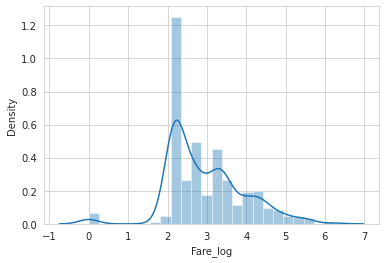

In [ ]:
#Fare 로그처리 -> 정규분포로 바꿔주기
train["Fare_log"] =  np.log(train["Fare"] + 1)

#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(train["Fare_log"])


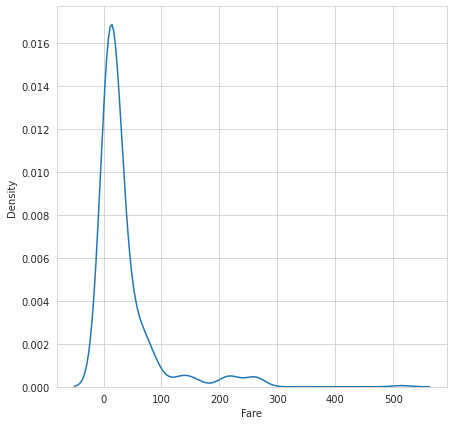

In [ ]:
fig, axes = plt.subplots(figsize=(7, 7))
sns.distplot(test["Fare"],  hist=False)



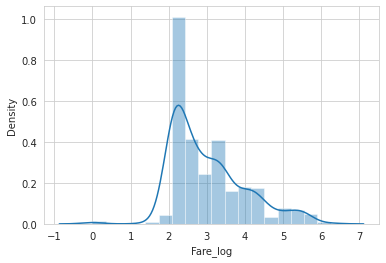

In [ ]:
test["Fare_log"] =  np.log(test["Fare"] + 1)
#분포가 어떻게 변했는지 그래프로 그려보기
sns.distplot(test["Fare_log"])


In [ ]:
test["Fare"] = test["Fare"].fillna(0)

for i in range(418):
    if(test.at[i,"Fare"]==0):
        if(test.at[i,"Pclass"]==1):
            test.at[i,"Fare"]=fare_first
        elif(test.at[i,"Pclass"]==2):
            test.at[i,"Fare"]=fare_second
        else:
            test.at[i,"Fare"]=fare_third


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    uint8  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Fare          891 non-null    float64
 9   Cabin         891 non-null    object 
 10  Embarked      891 non-null    int64  
 11  source        891 non-null    object 
 12  Prefix        891 non-null    int64  
 13  Family        891 non-null    int64  
 14  Age_log       891 non-null    float64
 15  Fare_log      891 non-null    float64
 16  Age_dgt       891 non-null    int64  
 17  Fare_dgt      891 non-null    int64  
 18  Family_dgt    891 non-null    

## 3. Classification Modeling


### 3.1. 상관관계

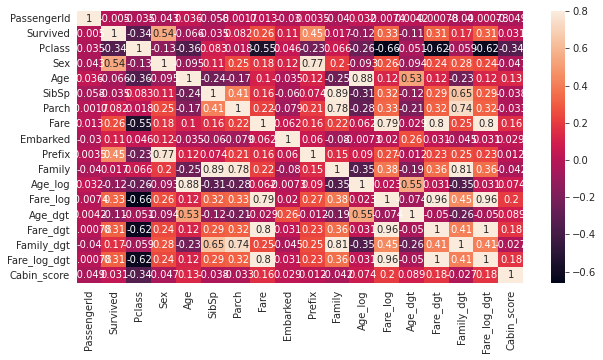

In [ ]:
# 히트맵

correlation_matrix = train.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,vmax=0.8,annot=True)
plt.show()

# Survived의 상관관계를 보면
# Fare_log가 -0.66으로 높다
# Age 남기고 Age_log, Age_log2, Fare, Fare_log2 삭제



> **Survived와 관계**
1. Sex: 0.54
2. Title: 0.44
3. Pclass: -0.34
4. Fare_log: 0.33

- 컬럼 삭제: 절대값 0.1 미만, 중복되는 값(fare, fare_log 등)

In [ ]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'source', 'Prefix', 'Family',
       'Age_log', 'Fare_log', 'Age_dgt', 'Fare_dgt', 'Family_dgt',
       'Fare_log_dgt', 'Cabin_score'],
      dtype='object')

In [ ]:
train_df = train[['Survived','Pclass','Sex','Embarked','Prefix','Fare_log','Age_log','Family_dgt']]


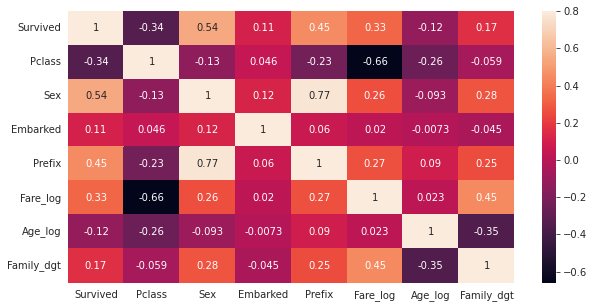

In [ ]:
correlation_matrix = train_df.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,vmax=0.8,annot=True)
plt.show()


> **Survived와 관계**
1. Sex: 0.54
2. Prefix: 0.45
3. Pclass: -0.34
4. Fare_log: 0.33
5. Family_dgt: 0.2
6. Age_log: -0.12
7. Embarked: 0.11

하지만 Sex와 Prefix는 매우 유사한 피처이며, 상관관계도 매우 높기 때문에 Survived와 더 높은 상관관계를 갖는 Sex를 남기고 Prefix는 제거


In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    uint8  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Fare          891 non-null    float64
 9   Cabin         891 non-null    object 
 10  Embarked      891 non-null    int64  
 11  source        891 non-null    object 
 12  Prefix        891 non-null    int64  
 13  Family        891 non-null    int64  
 14  Age_log       891 non-null    float64
 15  Fare_log      891 non-null    float64
 16  Age_dgt       891 non-null    int64  
 17  Fare_dgt      891 non-null    int64  
 18  Family_dgt    891 non-null    

In [ ]:
train["Age"] = train["Age"].astype(int)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    uint8  
 5   Age           891 non-null    int64  
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Fare          891 non-null    float64
 9   Cabin         891 non-null    object 
 10  Embarked      891 non-null    int64  
 11  source        891 non-null    object 
 12  Prefix        891 non-null    int64  
 13  Family        891 non-null    int64  
 14  Age_log       891 non-null    float64
 15  Fare_log      891 non-null    float64
 16  Age_dgt       891 non-null    int64  
 17  Fare_dgt      891 non-null    int64  
 18  Family_dgt    891 non-null    

In [ ]:

train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'source', 'Prefix', 'Family',
       'Age_log', 'Fare_log', 'Age_dgt', 'Fare_dgt', 'Family_dgt',
       'Fare_log_dgt', 'Cabin_score'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure

train_df, test_df = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass','Sex','Embarked','Fare_log','Age_log',"Family_dgt"]

X_train=train_df[target_col]
Y_train=train_df['Survived']

X_test=test_df[target_col]
Y_test=test_df['Survived']

features_one = X_train.values

target = Y_train.values

tree_model = DecisionTreeClassifier()
tree_model.fit(features_one, target)
dt_prediction = tree_model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(dt_prediction, Y_test))

# predict test data with pre-trained tree model
test_features = test_df[target_col].values
dt_prediction_result = tree_model.predict(test_features)



The accuracy of the Decision Tree is 0.7723880597014925


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(Y_test,yhat))
    print("For k = ",i," : ",accuracy_score(Y_test,yhat))


For k =  1  :  0.75
For k =  2  :  0.7611940298507462
For k =  3  :  0.7835820895522388
For k =  4  :  0.8022388059701493
For k =  5  :  0.7835820895522388
For k =  6  :  0.7947761194029851
For k =  7  :  0.7723880597014925
For k =  8  :  0.7910447761194029
For k =  9  :  0.7910447761194029
For k =  10  :  0.7947761194029851
For k =  11  :  0.7985074626865671
For k =  12  :  0.7985074626865671
For k =  13  :  0.7947761194029851
For k =  14  :  0.8022388059701493
For k =  15  :  0.7985074626865671
For k =  16  :  0.8208955223880597
For k =  17  :  0.8208955223880597
For k =  18  :  0.8171641791044776
For k =  19  :  0.8097014925373134


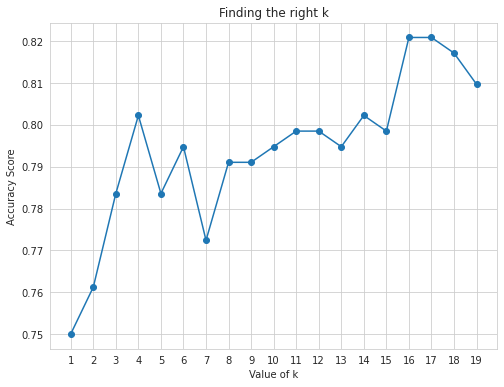

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()


In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 16)
KNN.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=16)

In [ ]:

y_pred = KNN.predict(X_test)


In [ ]:

df_KNN = pd.DataFrame()
df_KNN["PassengerId"] = test_df["PassengerId"]
df_KNN["Survived"] = y_pred


### 3.2. Decision Tree

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier


depth = [];

for i in range(1,20):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,Y_train)
    yhat = clf_tree.predict(X_test)
    depth.append(accuracy_score(Y_test,yhat))
    print("For max depth = ",i, " : ",accuracy_score(Y_test,yhat))


For max depth =  1  :  0.7873134328358209
For max depth =  2  :  0.7947761194029851
For max depth =  3  :  0.8097014925373134
For max depth =  4  :  0.8134328358208955
For max depth =  5  :  0.8097014925373134
For max depth =  6  :  0.7985074626865671
For max depth =  7  :  0.7985074626865671
For max depth =  8  :  0.8022388059701493
For max depth =  9  :  0.8022388059701493
For max depth =  10  :  0.7873134328358209
For max depth =  11  :  0.7910447761194029
For max depth =  12  :  0.7873134328358209
For max depth =  13  :  0.7910447761194029
For max depth =  14  :  0.7985074626865671
For max depth =  15  :  0.7910447761194029
For max depth =  16  :  0.8059701492537313
For max depth =  17  :  0.7835820895522388
For max depth =  18  :  0.8059701492537313
For max depth =  19  :  0.7947761194029851


ValueError: ignored

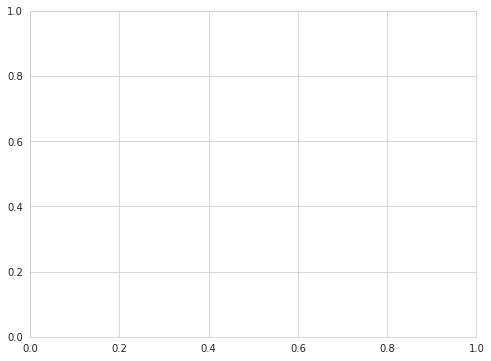

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.show()


In [ ]:
clf_tr = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 3)
clf_tr.fit(X_train,Y_train)
pred_tree = clf_tr.predict(X_test)
df_TREE = pd.DataFrame()
df_TREE["PassengerId"] = test_df["PassengerId"]
df_TREE["Survived"] = pred_tree
df_TREE.head()


,PassengerId,Survived
495,496,0
648,649,0
278,279,0
31,32,1
255,256,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=100)
model


DecisionTreeClassifier(random_state=100)

In [ ]:
model.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=100)

In [ ]:
y_predict = model.predict(X_test, )
y_predict[:5]


array([0, 0, 0, 1, 1])

In [ ]:
# train과 test값을 다르게 예측한 데이터 개수
(y_predict != Y_test).sum()


58

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_predict) * 100



78.35820895522389

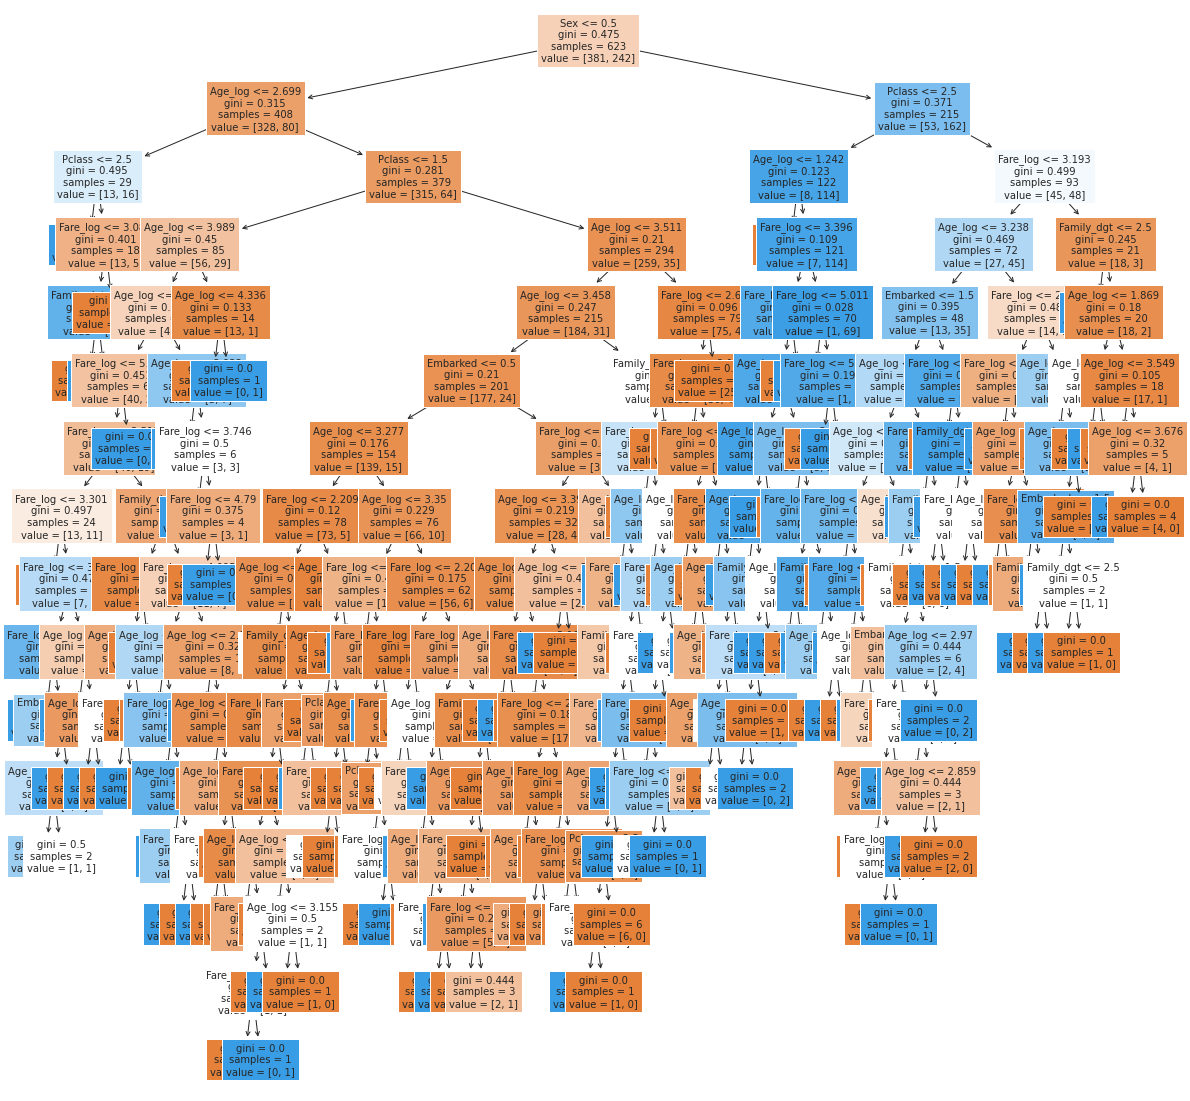

In [ ]:
#라이브러리 불러오기
from sklearn.tree import plot_tree

#트리 알고리즘 시각화하기 (plot_tree(의사결정나무(_알고리즘),의사결정에 사용한 칼럼 지정해주기))
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=target_col,
                 filled=True, fontsize=10)


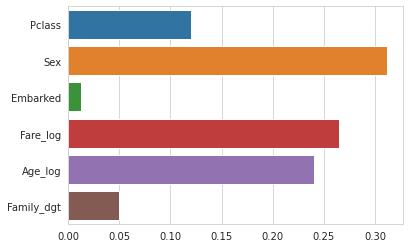

In [ ]:
# 중요도 분석
model.feature_importances_
sns.barplot(x=model.feature_importances_, y=target_col)


In [ ]:
#score 함수 사용해서 정확도 구하기
model.score(X_test, Y_test) * 100


78.35820895522389

In [ ]:
from sklearn.metrics import accuracy_score
for max_depth in range(1,15):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    y_predict = model.fit(X_train, Y_train).predict(X_test)
    score = accuracy_score(Y_test, y_predict)*100
    print(max_depth, score)


1 78.73134328358209
2 79.47761194029852
3 80.97014925373134
4 81.34328358208955
5 80.97014925373134
6 80.22388059701493
7 80.97014925373134
8 82.83582089552239
9 82.83582089552239
10 78.35820895522389
11 79.8507462686567
12 77.23880597014924
13 78.73134328358209
14 77.23880597014924


### 3.3. RandomForest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,Y_train)
yhat = clf_forest.predict(X_test)
print("Accuracy for training data : ",accuracy_score(Y_test,yhat))


Accuracy for training data :  0.8171641791044776


In [ ]:
clf_for = RandomForestClassifier(random_state=0)
clf_for.fit(X_train,Y_train)
y_forest = clf_for.predict(X_test)
df_FOREST = pd.DataFrame()
df_FOREST["PassengerId"] = test_df["PassengerId"]
df_FOREST["Survived"] = y_forest
df_FOREST.head()


,PassengerId,Survived
495,496,0
648,649,0
278,279,0
31,32,1
255,256,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_predict = model.predict(X_test)
y_predict[:10]


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
# train과 test값을 다르게 예측한 데이터 개수
(y_predict != Y_test).sum()
accuracy_score(Y_test, y_predict) * 100


80.97014925373134

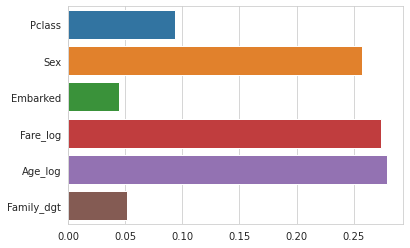

In [ ]:
# 중요도 분석
model.feature_importances_
sns.barplot(x=model.feature_importances_, y=target_col)


In [ ]:
#score 함수 사용해서 정확도 구하기
model.score(X_test, Y_test) * 100


80.97014925373134

In [ ]:
from sklearn.metrics import accuracy_score
for max_depth in range(1,15):
    model = RandomForestClassifier(max_depth = max_depth, random_state = 42)
    y_predict = model.fit(X_train, Y_train).predict(X_test)
    score = accuracy_score(Y_test, y_predict)*100
    print(max_depth, score)


1 77.98507462686567
2 79.1044776119403
3 80.22388059701493
4 79.8507462686567
5 80.97014925373134
6 80.59701492537313
7 81.71641791044776
8 82.46268656716418
9 84.32835820895522
10 83.2089552238806
11 83.2089552238806
12 82.83582089552239
13 82.08955223880598
14 80.97014925373134


### 3.3. SVM

In [ ]:
### SVM
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train,Y_train)
yhat = clf_svm.predict(X_test)
clf_SVM = SVC(gamma='auto')
clf_SVM.fit(X_train,Y_train)
pred_svm = clf_SVM.predict(X_test)
df_SVM = pd.DataFrame()
df_SVM["PassengerId"] = test_df["PassengerId"]
df_SVM["Survived"] = pred_svm
df_SVM.head()


,PassengerId,Survived
495,496,0
648,649,0
278,279,0
31,32,1
255,256,1


### 3.4. GaussianNB

In [ ]:
### GaussianNB
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X_train,Y_train)
y_hat = clf_NB.predict(X_test)
print("Accuracy for training data : ",accuracy_score(Y_test,y_hat))


Accuracy for training data :  0.7947761194029851


In [ ]:
clf_NB = GaussianNB()
clf_NB.fit(X_train,Y_train)
pred_NB = clf_NB.predict(X_test)
df_NB = pd.DataFrame()
df_NB["PassengerId"] = test_df["PassengerId"]
df_NB["Survived"] = pred_NB
df_NB.head()


,PassengerId,Survived
495,496,0
648,649,0
278,279,1
31,32,1
255,256,1


### 3.5. Logistic Regression

In [ ]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression


regr = LogisticRegression(solver='liblinear', random_state=1)
regr.fit(X_train,Y_train)
yhat = regr.predict(X_test)
print("Accuracy for training data : ",accuracy_score(Y_test,y_hat))


Accuracy for training data :  0.7947761194029851


In [ ]:
reg = LogisticRegression(solver='liblinear', random_state=1)
reg.fit(X_train,Y_train)
y_LR = reg.predict(X_test)
df_LR = pd.DataFrame()
df_LR["PassengerId"] = test_df["PassengerId"]
df_LR["Survived"] = y_LR
df_LR.head()



,PassengerId,Survived
495,496,0
648,649,0
278,279,0
31,32,1
255,256,1


### 3.6. SGD

In [ ]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(loss="squared_loss", penalty="l2", max_iter=4500,tol=-1000, random_state=1)
clf_SGD.fit(X_train,Y_train)
yhat = clf_SGD.predict(X_test)
print(accuracy_score(Y_test,yhat))

0.34701492537313433


In [ ]:

clf_SGD = SGDClassifier(loss="squared_loss", penalty="l2", max_iter=4500, tol=-1000, random_state=1)
clf_SGD.fit(X_train,Y_train)
y_SGD = clf_SGD.predict(X_test)
df_SGD = pd.DataFrame()
df_SGD["PassengerId"] = test_df["PassengerId"]
df_SGD["Survived"] = y_SGD
df_SGD.head()

,PassengerId,Survived
495,496,1
648,649,1
278,279,1
31,32,1
255,256,1


### 3.7. GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model =GradientBoostingClassifier()
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)
y_predict[:5]


array([0, 0, 0, 1, 1])

In [ ]:
# train과 test값을 다르게 예측한 데이터 개수
(y_predict != Y_test).sum()
accuracy_score(Y_test, y_predict) * 100


82.83582089552239

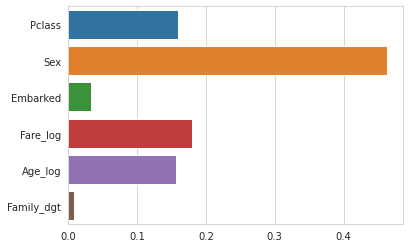

In [ ]:
# 중요도 분석
model.feature_importances_
sns.barplot(x=model.feature_importances_, y=target_col)


In [ ]:
#score 함수 사용해서 정확도 구하기
model.score(X_test, Y_test) * 100


82.83582089552239

In [ ]:
from sklearn.metrics import accuracy_score
for max_depth in range(1,15):
    model = GradientBoostingClassifier(max_depth = max_depth, random_state = 42)
    y_predict = model.fit(X_train, Y_train).predict(X_test)
    score = accuracy_score(Y_test, y_predict)*100
    print(max_depth, score)


1 79.1044776119403
2 82.08955223880598
3 82.83582089552239
4 83.5820895522388
5 84.32835820895522
6 82.46268656716418
7 83.2089552238806
8 82.83582089552239
9 82.08955223880598
10 82.83582089552239
11 81.71641791044776
12 79.1044776119403
13 79.1044776119403
14 76.49253731343283


### 3.8. lgbm

In [ ]:

from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, Y_test)]
lgbm_wrapper.fit(X_train, Y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]


[1]	valid_0's binary_logloss: 0.619993	valid_0's binary_logloss: 0.619993
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.587163	valid_0's binary_logloss: 0.587163
[3]	valid_0's binary_logloss: 0.558959	valid_0's binary_logloss: 0.558959
[4]	valid_0's binary_logloss: 0.535986	valid_0's binary_logloss: 0.535986
[5]	valid_0's binary_logloss: 0.517218	valid_0's binary_logloss: 0.517218
[6]	valid_0's binary_logloss: 0.500099	valid_0's binary_logloss: 0.500099
[7]	valid_0's binary_logloss: 0.485773	valid_0's binary_logloss: 0.485773
[8]	valid_0's binary_logloss: 0.474667	valid_0's binary_logloss: 0.474667
[9]	valid_0's binary_logloss: 0.464054	valid_0's binary_logloss: 0.464054
[10]	valid_0's binary_logloss: 0.454225	valid_0's binary_logloss: 0.454225
[11]	valid_0's binary_logloss: 0.446192	valid_0's binary_logloss: 0.446192
[12]	valid_0's binary_logloss: 0.439943	valid_0's binary_logloss: 0.439943
[13]	valid_0's binary_logloss: 0.433628	valid_

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, Pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)

    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [ ]:
get_clf_eval(Y_test, preds, pred_proba)


오차 행렬
[[153  15]
 [ 27  73]]
정확도:0.8433, 정밀도:0.8295, 재현율:0.7300, F1:0.7766, AUC:0.8843


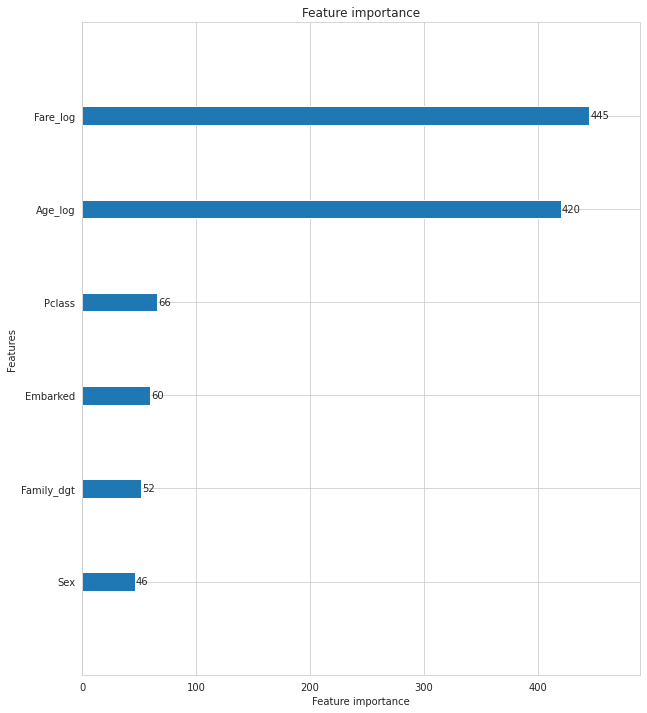

In [ ]:
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)


### 3.9. Feature Engineering: RandomizedSearchCV 활용

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier


estimators = [DecisionTreeClassifier(random_state=42),
                        RandomForestClassifier(random_state=42),
                        GradientBoostingClassifier(random_state=42),
                        #SGDClassifier(random_state=42),
                        #LogisticRegression(random_state=42),
                        #GaussianNB,
                        #SVC(random_state=42),
                        LGBMClassifier(random_state=42)

             ]
estimators
max_depth = np.random.randint(2,20,10)

max_features = np.random.uniform(0.3,1.0,7)


In [ ]:
results = []
for estimator in estimators:
    result =[]
    result.append(estimator.__class__.__name__)
    results.append(result)
results
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": max_depth,
                       "max_features": max_features}

results = []


In [ ]:
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(10, 100, 10)

    clf = RandomizedSearchCV(estimator,
                       param_distributions,
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5,
                       verbose=2
                      )
    # elif estimator.__class__.__name__ == 'SGDClassifier':
    #     loss="squared_loss", penalty="l2", max_iter=4500,tol=-1000, random_state=1

    clf.fit(X_train, Y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, Y_test))
    result.append(clf.cv_results_)
    results.append(result)


Fitting 5 folds for each of 70 candidates, totalling 350 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
pd.DataFrame(results)

,0,1,2,3,4
0,DecisionTreeClassifier,"{'max_features': 0.8864366217847293, 'max_dept...",0.808981,0.794776,"{'mean_fit_time': [0.007400655746459961, 0.006..."
1,RandomForestClassifier,"{'n_estimators': 20, 'max_features': 0.8864366...",0.821845,0.809701,"{'mean_fit_time': [0.08068127632141113, 0.2019..."
2,GradientBoostingClassifier,"{'n_estimators': 41, 'max_features': 0.4964305...",0.823471,0.817164,"{'mean_fit_time': [0.07434473037719727, 0.4892..."
3,LGBMClassifier,"{'n_estimators': 25, 'max_features': 0.4856362...",0.821871,0.813433,"{'mean_fit_time': [0.04553060531616211, 0.0181..."


In [ ]:

# DecisionTree, RandomForestClassifier, GBM, LGBM 결과
r_search_result = pd.DataFrame(results,
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
r_search_result.sort_values('test_score', ascending=False)

,estimator,best_params,train_score,test_score,cv_result
2,GradientBoostingClassifier,"{'n_estimators': 41, 'max_features': 0.4964305...",0.823471,0.817164,"{'mean_fit_time': [0.07434473037719727, 0.4892..."
3,LGBMClassifier,"{'n_estimators': 25, 'max_features': 0.4856362...",0.821871,0.813433,"{'mean_fit_time': [0.04553060531616211, 0.0181..."
1,RandomForestClassifier,"{'n_estimators': 20, 'max_features': 0.8864366...",0.821845,0.809701,"{'mean_fit_time': [0.08068127632141113, 0.2019..."
0,DecisionTreeClassifier,"{'max_features': 0.8864366217847293, 'max_dept...",0.808981,0.794776,"{'mean_fit_time': [0.007400655746459961, 0.006..."


lgbm classifier를 사용했을 때 가장 test score가 높군요!